<a href="https://colab.research.google.com/github/Coulibdavid/transcription/blob/main/ML_Coulibaly_Sikata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# `Introduction`

In this notebook, you should implement Google Cloud Speech library to transcribe an audio file, and to show the word cloud chart associated to the transcription

# Notebook Code


1- Install Google Cloud Speech

In [ ]:
# After executing the google cloud speech installation code, we need to Restart Runtime to finish installation.  
!pip install google-cloud-speech

2- Transcribe the following audio file using Google Speech-to-text library : https://fr.matious.com/data/sample1.wav


**Note :** If you are not able to create an account in Google Cloud, you can use this API credential file : https://drive.google.com/file/d/1iXJshjpo6sziZ39yD9JqCAo37brRX4Pz/view?usp=sharing

In [ ]:
# Import the Google Cloud client library
from google.cloud import speech
# import the operating system
import os
# the io library allows we to process the location of files.
import io

In [ ]:
#We define the environment variable
# Setting the environment variable allows we to provide identifiers separately from  application, without modifying the application code during deployment.
# We can also explicitly specify the path to the service account key file in your code.
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="/content/speech-6939b230dafc.json"

In [ ]:
# We  run  the following two lines of code to import our data "sample1.wav" from the local system.
from google.colab import files
uploaded = files.upload()

Saving sample1.wav to sample1.wav


#***built the get_text_from_audio() function to retrieve the text from the audio***

* **Note:** We can optimize the parameters using a Grid Search but we will have a code with more lines. I hope I will have the opportunity to do this with your team.
* **LINEAR16:** Uncompressed 16-bit signed little-endian samples
* **language_code:** The input audio language.
* **sample_rate_hertz:** Sample rate in Hertz of the audio data sent in all RecognitionAudio messages
* **command_and_search:** Best for short queries such as voice commands or voice search.We select the best model to get best results
* **audio_channel_count:**the channels in the input audio data ONLY set this for MULTI-CHANNEL recognition. Valid values for LINEAR16

In [ ]:
def get_text_from_audio(file_name):
    # Creates google client
    client = speech.SpeechClient()
    #Loads the audio file into memory
    with io.open(file_name, "rb") as audio_file:
         content = audio_file.read()
         audio = speech.RecognitionAudio(content=content)
    config = speech.RecognitionConfig(
    encoding=speech.RecognitionConfig.AudioEncoding.LINEAR16,
    sample_rate_hertz=48000,
    audio_channel_count=1,
    model = "command_and_search",
    language_code="fr-FR",
     )

    # Sends the request to google to transcribe the audio
    response = client.recognize(config = config, audio = audio)
    # Reads the response
    text_speech = []
    for result in response.results:
        #print("Transcript: {}".format(result.alternatives[0].transcript))
        text_speech.append(result.alternatives[0].transcript)
    text = " ".join(text_speech)
    return text

     

In [ ]:
get_text_from_audio("/content/sample1.wav")

"utiliser la vidéo pour communiquer c'est s'assurer une visibilité en choisissant le média le plus important et le plus populaire  utiliser la vidéo pour communiquer c'est s'assurer une visibilité en choisissant le média le plus important et le plus populaire  une entreprise a besoin de communiquer pour présenter son activité et les avantages de son offre  utiliser la vidéo pour communiquer ce assurer une visibilité en choisissant le média le plus important est le plus premier nous apporte aux entreprises une communication vidéo professionnelle créative et adapté à leur budget apporte aux entreprises une communication vidéo professionnelle créative et adapté à leur budget  Pamela apporte aux entreprises une communication vidéo professionnel active adapter"

3- Show a word cloud chart based on the occurence frequency of the words that compose the transcribed audio. Example : http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1530034171/Aromas_bfy0ec.png 

In [ ]:
#We import the wordCloud library for visualization
from wordcloud import WordCloud
#matplotlib is a base library that allows many other libraries to run and plot on its base, including  WordCloud
import matplotlib.pyplot as plt
#Import stopword to process empty words
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#***built the word_image() function to display the word cloud***

In [ ]:
def word_image(data):
    # Sometimes we can come across English words in French.
    final_stopwords_list =stopwords.words('french')+ stopwords.words('french')
    text_words = ''
    #split the value 
    tokens = data.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    text_words += " ".join(tokens)+" "
  
    wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords = final_stopwords_list, 
                min_font_size = 10).generate(text_words) 
  
    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
  
    plt.show()

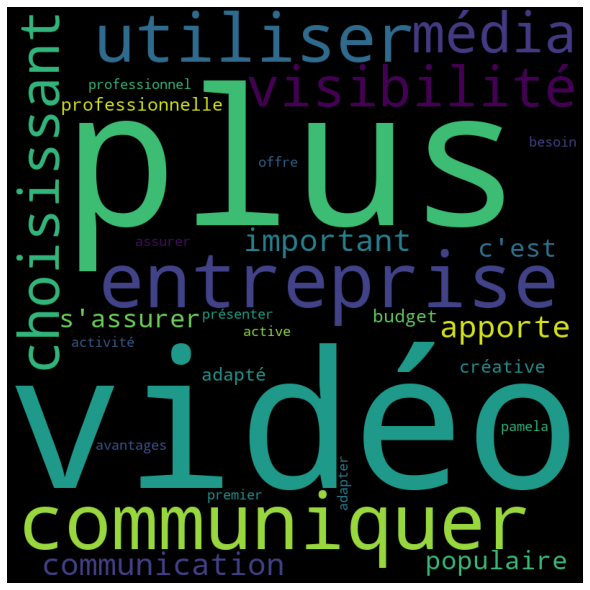

In [ ]:
word_image(get_text_from_audio("/content/sample1.wav"))